**Instructors**: Prof. Keith Chugg (chugg@usc.edu) & Prof. Antonio Ortega (aortega@usc.edu)

**Teaching Assistant**: Alexios Rustom (arustom@usc.edu)

**Notebooks**: Written by Alexios Rustom (arustom@usc.edu)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def plot_histo_classes(y_train, y_test, labels):
    df_train = pd.DataFrame(y_train, columns=['Label']) 
    df_test = pd.DataFrame(y_test, columns=['Label']) 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
    train_data_class_1 = df_train[df_train['Label'] == 1]
    train_data_class_2 = df_train[df_train['Label'] == 2]
    train_data_class_1_2 = {labels[0]: [train_data_class_1.shape[0]], labels[1]: [train_data_class_2.shape[0]]}
    train_df_class_1_2 = pd.DataFrame(data=train_data_class_1_2)
    train_df_class_1_2.plot(kind='bar', ax=ax1, color={labels[0]: "red", labels[1]: "green"}, fontsize=16)
    ax1.set_title('Train Dataset', fontsize=18)
    ax1.set_xticks([])
    test_data_class_1 = df_test[df_test['Label'] == 1]
    test_data_class_2 = df_test[df_test['Label'] == 2]
    test_data_class_1_2 = {labels[0]: [test_data_class_1.shape[0]], labels[1]: [test_data_class_2.shape[0]]}
    test_df_class_1_2 = pd.DataFrame(data=test_data_class_1_2)
    test_df_class_1_2.plot(kind='bar', ax=ax2, color={labels[0]: "red", labels[1]: "green"}, fontsize=16)
    ax2.set_title('Test Dataset', fontsize=18)
    ax2.set_xticks([])
    plt.show()

In [3]:
column_names = ["Political-party", "handicapped-infants", "water-project-cost-sharing", "adoption-of-the-budget-resolution", "physician-fee-freeze",
         "el-salvador-aid", "religious-groups-in-schools", "anti-satellite-test-ban", "aid-to-nicaraguan-contras",
         "mx-missile", "immigration", "synfuels-corporation-cutback", "education-spending", "superfund-right-to-sue",
         "crime", "duty-free-exports", "export-administration-act-south-africa"]

In [4]:
data = pd.read_csv('house-votes-84.csv', names=column_names)

In [5]:
data

,Political-party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [6]:
data = data.replace(['republican','democrat', 'y', 'n', '?'],[1,2, 1, -1, 0])
data

,Political-party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,2,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,2,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,2,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,1,-1,-1,1,1,1,1,-1,-1,1,1,-1,1,1,1,-1,1
431,2,-1,-1,1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,-1,1
432,1,-1,0,-1,1,1,1,-1,-1,-1,-1,1,1,1,1,-1,1
433,1,-1,-1,-1,1,1,1,0,0,0,0,-1,1,1,1,-1,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Political-party                         435 non-null    int64
 1   handicapped-infants                     435 non-null    int64
 2   water-project-cost-sharing              435 non-null    int64
 3   adoption-of-the-budget-resolution       435 non-null    int64
 4   physician-fee-freeze                    435 non-null    int64
 5   el-salvador-aid                         435 non-null    int64
 6   religious-groups-in-schools             435 non-null    int64
 7   anti-satellite-test-ban                 435 non-null    int64
 8   aid-to-nicaraguan-contras               435 non-null    int64
 9   mx-missile                              435 non-null    int64
 10  immigration                             435 non-null    int64
 11  synfuels-corporatio

In [8]:
df_X = data[["handicapped-infants", "water-project-cost-sharing", "adoption-of-the-budget-resolution", "physician-fee-freeze",
         "el-salvador-aid", "religious-groups-in-schools", "anti-satellite-test-ban", "aid-to-nicaraguan-contras",
         "mx-missile", "immigration", "synfuels-corporation-cutback", "education-spending", "superfund-right-to-sue",
         "crime", "duty-free-exports", "export-administration-act-south-africa"]]
X = df_X.to_numpy()
df_y = data['Political-party']
y = df_y.to_numpy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

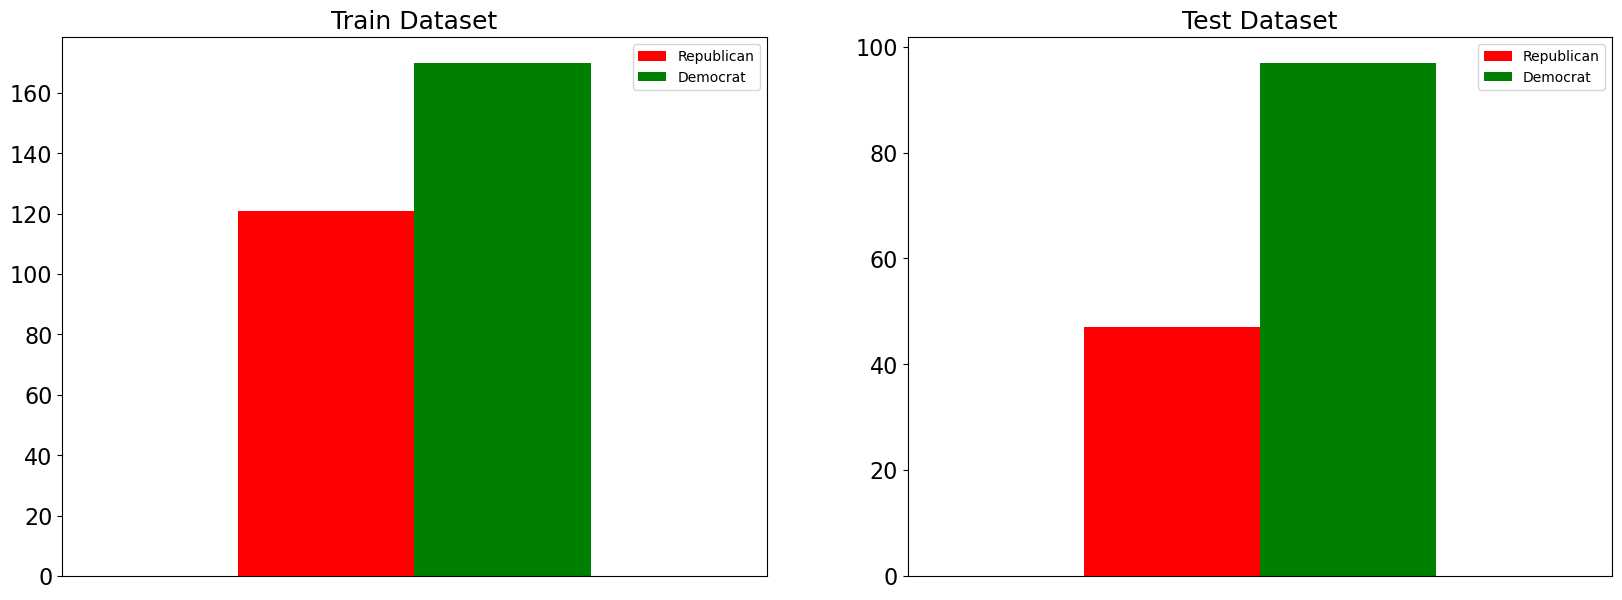

In [10]:
plot_histo_classes(y_train, y_test, labels = ['Republican', 'Democrat'])